# **Data Analysis of Employee Performance Score**
</h3> In this data analysis, we will identify the key features that have the greatest influence on employee performance scores<h3/>
</h3> Does Compensation rule out all the other variables impacting performance?<h3/>
</h3>Data Source- Kaggle.com<h3/>

#### This dataset includes details related to the employee's job, work habits, education, performance, and satisfaction

</h3>Employee_ID: Unique identifier for each employee.<h3/>
</h3>Department: The department in which the employee works.<h3/>
</h3>Gender: Gender of the employee.<h3/>
</h3>Age: Employee's age (between 22 and 60).
</h3>Job_Title: The role held by the employee (e.g., Manager, Analyst, Developer).<h3/>
</h3>Hire_Date: The date the employee was hired.<h3/>
</h3>Years_At_Company: The number of years the employee has been working for the company.<h3/>
</h3>Education_Level: Highest educational qualification .<h3/>
</h3>Performance_Score: Employee's performance rating (1 to 5 scale).<h3/>
</h3>Monthly_Salary: The employee's monthly salary in USD.<h3/>
</h3>Work_Hours_Per_Week: Number of hours worked per week.<h3/>
</h3>Projects_Handled: Total number of projects handled by the employee.<h3/>
</h3>Overtime_Hours: Total overtime hours worked in the last year.<h3/>
</h3>Sick_Days: Number of sick days taken by the employee.<h3/>
</h3>Remote_Work_Frequency: Percentage of time worked remotely (0%, 25%, 50%, 75%, 100%).<h3/>
</h3>Team_Size: Number of people in the employee's team.<h3/>
</h3>Training_Hours: Number of hours spent in training.<h3/>
</h3>Promotions: Number of promotions received during their tenure.<h3/>
</h3>Employee_Satisfaction_Score: Employee satisfaction rating (1.0 to 5.0 scale).<h3/>
</h3>Resigned: Boolean value indicating if the employee has resigned.<h3/>

In [65]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip3 install seaborn
import seaborn as sns



Defaulting to user installation because normal site-packages is not writeable


Importing dataset using pandas

In [66]:
#Importing dataset
import pandas as pd
df = pd.read_csv("file.csv")
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


# **Data Wrangling**
</h3>-Finding and Removing duplicates<h3/>
</h3>-Replacing null values<h3/>

In [67]:
#Finding duplicates
df[df.duplicated()]

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned


No duplicates were found

In [68]:
#Finding null values
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

No null values were found

In [69]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

### Finding correlation of Performance Score with other variables

Finding out which of the follwoing features are correlated the most with Employee Satisfaction Score
</h3>-Age<h3/>
</h3>-Job Title<h3/>
</h3>-Years_At_Company<h3/>
</h3>-Education_Level<h3/>
</h3>-Monthly_Salary<h3/>
</h3>-Work_Hours_Per_Week<h3/>
</h3>-Projects_Handled<h3/>
</h3>-Overtime_Hours<h3/>
</h3>-Sick_Days<h3/>
</h3>-Remote_Work_Frequency<h3/>
</h3>-Team_Size<h3/>
</h3>-Training_Hours<h3/>
</h3>-Promotions<h3/>

In [70]:
df1=df.select_dtypes(include=['int64', 'float64'])
df1.corr()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
Employee_ID,1.000000,0.004010,-0.007175,-0.002077,-0.002050,-0.000968,-0.000706,-0.005254,0.000745,-0.000347,0.002027,-0.002966,-0.000778,-0.001595
Age,0.004010,1.000000,0.000078,0.001598,0.002757,-0.003050,-0.001726,0.001875,0.006981,-0.004672,-0.003411,0.002045,-0.002888,-0.000124
Years_At_Company,-0.007175,0.000078,1.000000,0.001598,-0.000645,0.002578,0.002963,0.001965,-0.004371,-0.002443,0.003250,0.002696,-0.002737,-0.003180
Performance_Score,-0.002077,0.001598,0.001598,1.000000,0.510035,-0.005627,0.000640,-0.001312,0.002994,0.001733,-0.005174,0.002358,-0.003501,0.001696
Monthly_Salary,-0.002050,0.002757,-0.000645,0.510035,1.000000,-0.002347,-0.001925,-0.003029,0.003610,-0.000464,0.002972,-0.001088,-0.001940,0.001083
Work_Hours_Per_Week,-0.000968,-0.003050,0.002578,-0.005627,-0.002347,1.000000,-0.004183,0.005787,-0.000838,-0.004618,0.000790,0.001287,0.000238,0.000530
Projects_Handled,-0.000706,-0.001726,0.002963,0.000640,-0.001925,-0.004183,1.000000,0.004107,-0.004995,0.000484,0.003813,0.002211,-0.002344,0.006126
Overtime_Hours,-0.005254,0.001875,0.001965,-0.001312,-0.003029,0.005787,0.004107,1.000000,0.004255,-0.004349,0.002175,0.002939,-0.002537,0.001052
Sick_Days,0.000745,0.006981,-0.004371,0.002994,0.003610,-0.000838,-0.004995,0.004255,1.000000,0.000478,0.000149,0.000347,-0.003044,-0.000893
Remote_Work_Frequency,-0.000347,-0.004672,-0.002443,0.001733,-0.000464,-0.004618,0.000484,-0.004349,0.000478,1.000000,-0.000668,0.005227,-0.000537,-0.001408


<Axes: xlabel='Age', ylabel='Performance_Score'>

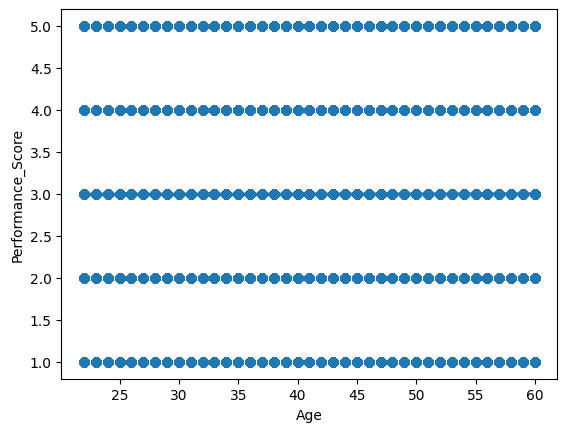

In [72]:
#Correlation of Performance Score with Age using regression plot
sns.regplot(x='Age', y = 'Performance_Score', data = df)

There is no correlation between age and performance score

<Axes: xlabel='Job_Title', ylabel='Performance_Score'>

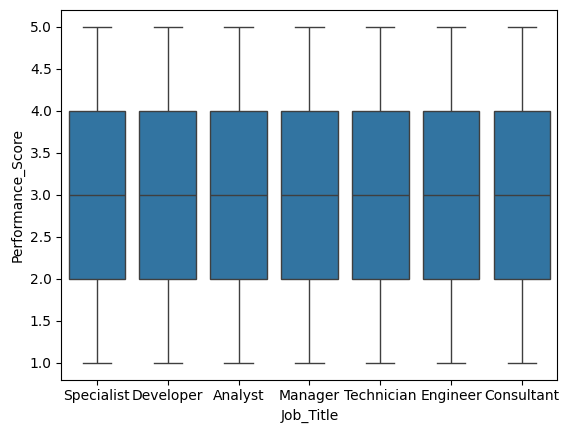

In [73]:
#Correlation of Performance Score with Job Title using box plot

sns.boxplot(x='Job_Title', y = 'Performance_Score', data = df)


There is no correlation between Job title and performance score

<Axes: xlabel='Years_At_Company', ylabel='Performance_Score'>

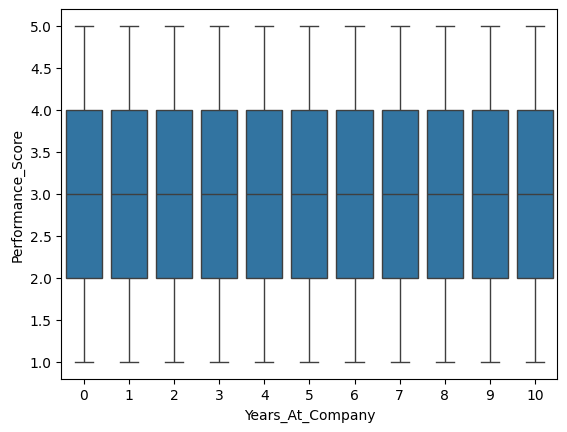

In [74]:
#Correlation of Performance Score with Years At Company using boxplot
sns.boxplot(x='Years_At_Company', y = 'Performance_Score', data = df)

There is no correlation between years at company and performance score

<Axes: xlabel='Education_Level', ylabel='Performance_Score'>

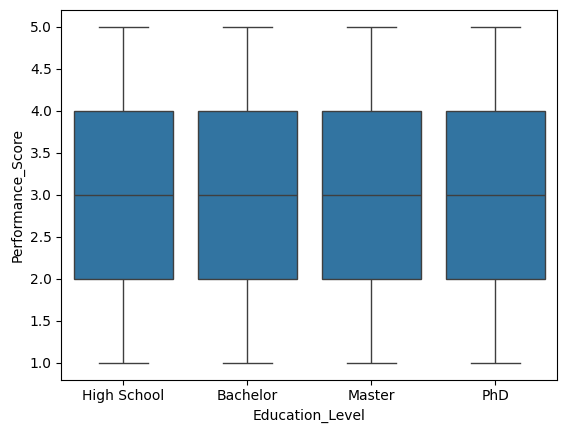

In [75]:
#Correlation of Performance Score with Education Level using boxplot
sns.boxplot(x='Education_Level', y = 'Performance_Score', data = df)

There is no correlation between education level and performance score

<Axes: xlabel='Monthly_Salary', ylabel='Performance_Score'>

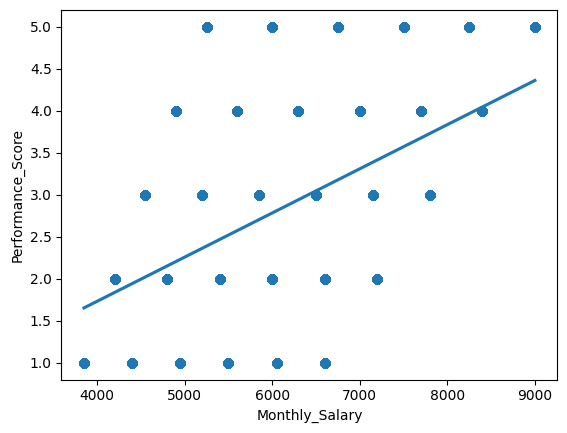

In [76]:
#Correlation of Performance Score with Monthly Salary using regression plot
sns.regplot(x='Monthly_Salary', y = 'Performance_Score', data = df)

There is a positive correlation between monthly salary and performance score

<Axes: xlabel='Work_Hours_Per_Week', ylabel='Performance_Score'>

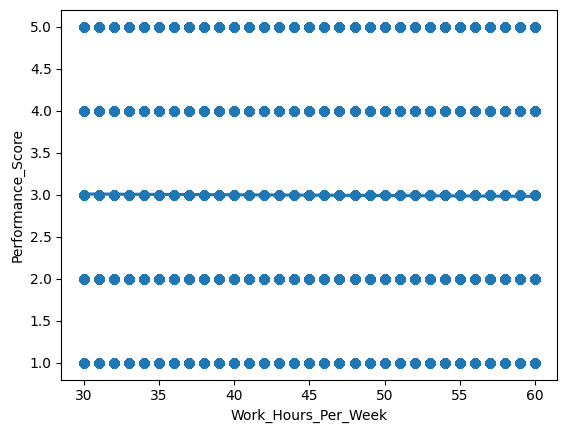

In [77]:
#Correlation of Performance Score with Work hours per week using regression plot
sns.regplot(x='Work_Hours_Per_Week', y = 'Performance_Score', data = df)

There is no correlation between Work hours per week and performance score

<Axes: xlabel='Projects_Handled', ylabel='Performance_Score'>

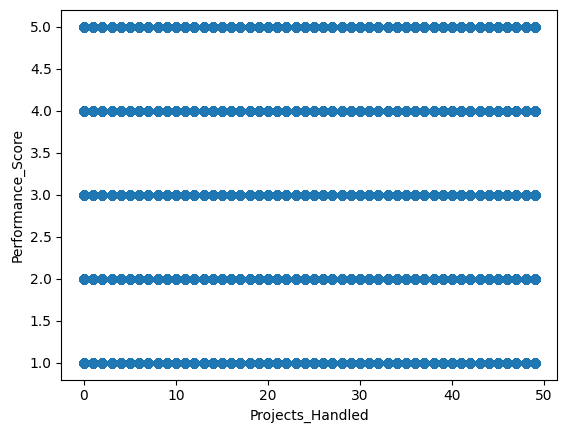

In [78]:
#Correlation of Performance Score with Projects Handled using regression plot
sns.regplot(x='Projects_Handled', y = 'Performance_Score', data = df)

There is no correlation between projects handled and performance score

<Axes: xlabel='Overtime_Hours', ylabel='Performance_Score'>

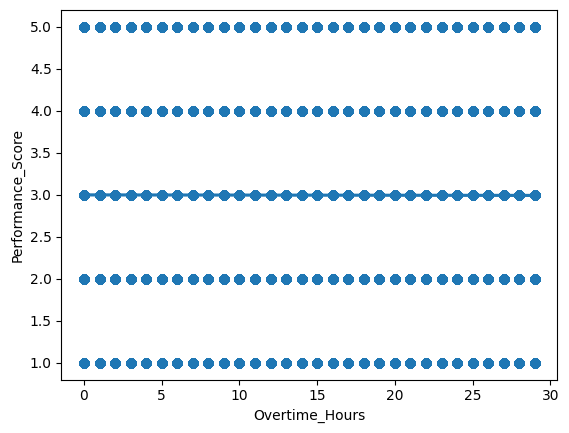

In [79]:
#Correlation of Performance Score with Overtime Hours using regression plot
sns.regplot(x='Overtime_Hours', y = 'Performance_Score', data = df)

There is no correlation between overtime hours and performance score

<Axes: xlabel='Sick_Days', ylabel='Performance_Score'>

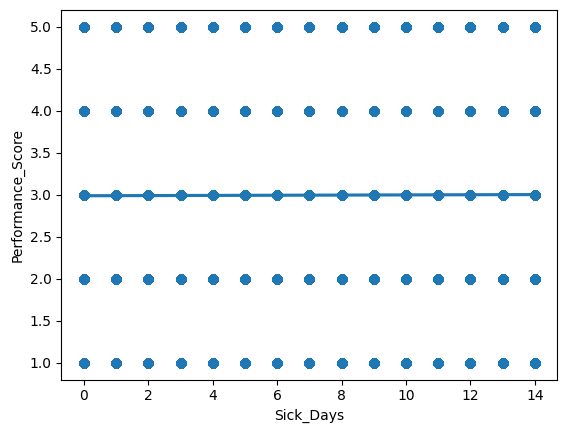

In [80]:
#Correlation of Performance Score with Sick days using regression plot
sns.regplot(x='Sick_Days', y = 'Performance_Score', data = df)

There is no correlation between sick days and performance score

<Axes: xlabel='Remote_Work_Frequency', ylabel='Performance_Score'>

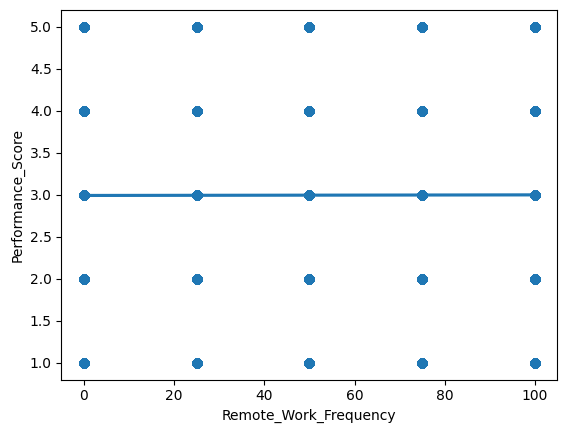

In [81]:
#Correlation of Performance Score with Remote work Frequency using regression plot
sns.regplot(x='Remote_Work_Frequency', y = 'Performance_Score', data = df)

There is no correlation between remote work frequency and performance score

<Axes: xlabel='Team_Size', ylabel='Performance_Score'>

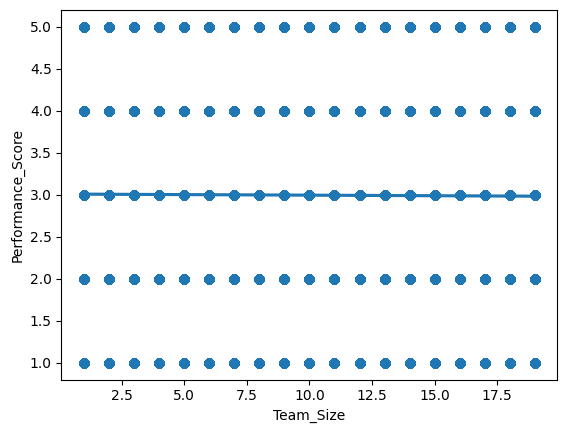

In [82]:

#Correlation of Performance Score with Team size using regression plot
sns.regplot(x='Team_Size', y = 'Performance_Score', data = df)

There is no correlation between team size and performance score

<Axes: xlabel='Training_Hours', ylabel='Performance_Score'>

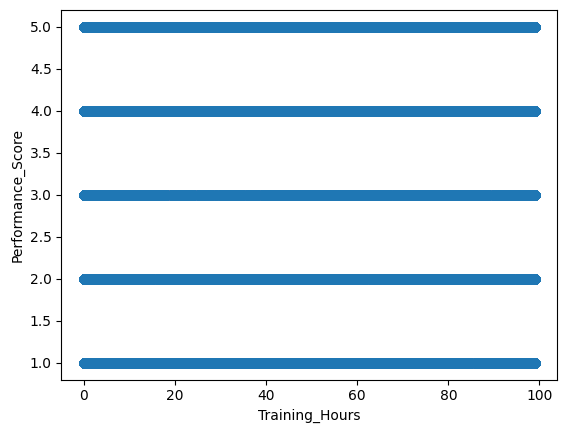

In [83]:
#Correlation of Performance Score with Training Hours using regression plot
sns.regplot(x='Training_Hours', y = 'Performance_Score', data = df)

There is no correlation between training hours and performance score

<Axes: xlabel='Promotions', ylabel='Performance_Score'>

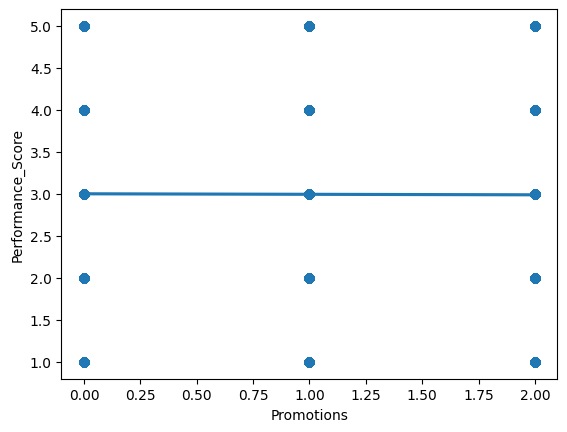

In [84]:
#Correlation of Performance Score with Promotions using regression plot
sns.regplot(x='Promotions', y = 'Performance_Score', data = df)

There is no correlation between promotions and performance score

## Conclusion

It is evident from the analysis that Compensation or Salary has the most impact on the Employee Performance Score.

                                                                                     Analysis performed by Sarah Khan